In [106]:
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
df = pd.read_csv("forestfires.csv")
df

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,7,5,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.00
1,7,4,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.00
2,7,4,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.00
3,8,6,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.00
4,8,6,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...
512,4,3,aug,sun,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,6.44
513,2,4,aug,sun,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,54.29
514,7,4,aug,sun,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,11.16
515,1,4,aug,sat,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,0.00


In [6]:
df[df.isna().any(axis=1)]

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area


In [32]:
print(list(pd.unique(df["month"])))
print(list(pd.unique(df["day"])))

['mar', 'oct', 'aug', 'sep', 'apr', 'jun', 'jul', 'feb', 'jan', 'dec', 'may', 'nov']
['fri', 'tue', 'sat', 'sun', 'mon', 'wed', 'thu']


In [35]:
day_dic = {'fri':6, 'tue':3, 'sat':7, 'sun':1, 'mon':2, 'wed':4, 'thu':5}
month_dic = {'mar':3,
             'oct':10,
             'aug':8,
             'sep':9,
             'apr':4,
             'jun':6,
             'jul':7,
             'feb':2,
             'jan':1,
             'dec':12,
             'may':5,
             'nov':11}

In [36]:
df1= df
df1["month"] = df1.apply(lambda x:month_dic[x["month"]],axis=1)
df1["day"] = df1.apply(lambda x:day_dic[x["day"]],axis=1)
df1

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,7,5,3,6,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.00
1,7,4,10,3,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.00
2,7,4,10,7,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.00
3,8,6,3,6,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.00
4,8,6,3,1,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...
512,4,3,8,1,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,6.44
513,2,4,8,1,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,54.29
514,7,4,8,1,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,11.16
515,1,4,8,7,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,0.00


In [171]:
from sklearn.preprocessing import normalize,PolynomialFeatures

12.847292069632493
4052.063224823444
0.52


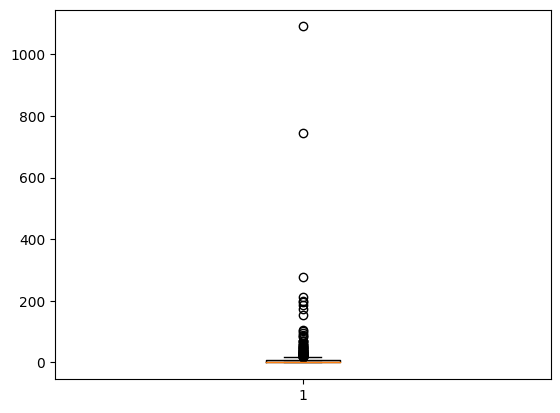

In [194]:
y = df1[["area"]]
X,norms = normalize(df1[['X', 'Y', 'month', 'day', 'FFMC', 'DMC', 'DC', 'ISI', 'temp', 'RH',
       'wind', 'rain']],return_norm=True)

plt.boxplot(y);
print(y["area"].mean())
print(y["area"].var())
print(y["area"].median())

In [195]:
poly = PolynomialFeatures(degree=2,interaction_only=False)
X = poly.fit_transform(X)
poly.get_feature_names_out(list(df1.columns[:-1]))

array(['1', 'X', 'Y', 'month', 'day', 'FFMC', 'DMC', 'DC', 'ISI', 'temp',
       'RH', 'wind', 'rain', 'X^2', 'X Y', 'X month', 'X day', 'X FFMC',
       'X DMC', 'X DC', 'X ISI', 'X temp', 'X RH', 'X wind', 'X rain',
       'Y^2', 'Y month', 'Y day', 'Y FFMC', 'Y DMC', 'Y DC', 'Y ISI',
       'Y temp', 'Y RH', 'Y wind', 'Y rain', 'month^2', 'month day',
       'month FFMC', 'month DMC', 'month DC', 'month ISI', 'month temp',
       'month RH', 'month wind', 'month rain', 'day^2', 'day FFMC',
       'day DMC', 'day DC', 'day ISI', 'day temp', 'day RH', 'day wind',
       'day rain', 'FFMC^2', 'FFMC DMC', 'FFMC DC', 'FFMC ISI',
       'FFMC temp', 'FFMC RH', 'FFMC wind', 'FFMC rain', 'DMC^2',
       'DMC DC', 'DMC ISI', 'DMC temp', 'DMC RH', 'DMC wind', 'DMC rain',
       'DC^2', 'DC ISI', 'DC temp', 'DC RH', 'DC wind', 'DC rain',
       'ISI^2', 'ISI temp', 'ISI RH', 'ISI wind', 'ISI rain', 'temp^2',
       'temp RH', 'temp wind', 'temp rain', 'RH^2', 'RH wind', 'RH rain',
       'wind

In [196]:
from sklearn.model_selection import cross_validate
from sklearn.linear_model import LinearRegression

In [197]:
folds=9

lr = LinearRegression()
cv_results = pd.DataFrame(cross_validate(lr,X,y,cv=folds,n_jobs=3,return_train_score=True,scoring=("max_error","r2","explained_variance","neg_root_mean_squared_error")))
cv_results.head()

,fit_time,score_time,test_max_error,train_max_error,test_r2,train_r2,test_explained_variance,train_explained_variance,test_neg_root_mean_squared_error,train_neg_root_mean_squared_error
0,0.007766,0.008354,-8.828103e+09,-1042.7150,0.000000e+00,0.049803,0.000000e+00,0.049870,-1.159187e+09,-65.620661
1,0.009025,0.004702,-7.605000e+02,-1045.3400,0.000000e+00,0.033564,0.000000e+00,0.033564,-1.536903e+02,-66.179042
2,0.013162,0.010176,-2.138125e+02,-1044.6525,-1.869181e+03,0.052274,-1.731888e+03,0.052275,-4.135774e+01,-65.559266
3,0.012076,0.010180,-1.863000e+02,-1048.3400,-3.618925e+00,0.049027,-2.431875e+00,0.049027,-4.404139e+01,-65.342031
4,0.044993,0.010050,-7.673542e+07,-693.9050,-5.576435e+09,0.077607,-5.551954e+09,0.077608,-1.115060e+07,-39.342564


-619604142.8124765

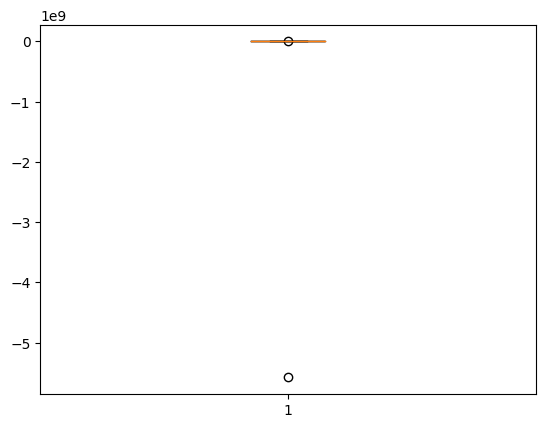

In [198]:
plt.boxplot(cv_results["test_r2"]);
(cv_results["test_r2"]).mean()

In [199]:
from sklearn.linear_model import Ridge,Lasso

In [200]:
folds = 3

In [201]:
import numpy as np
alphas = np.linspace(0.01,1,50)

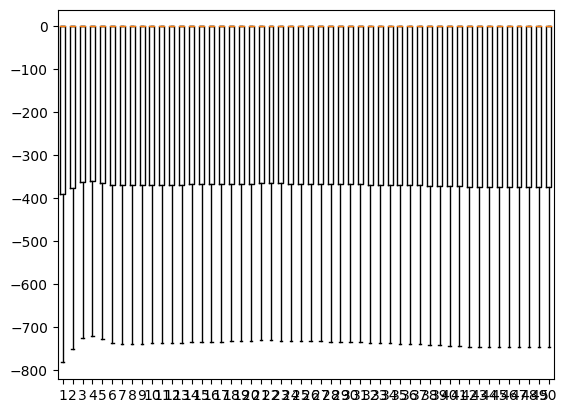

In [203]:
rmse = []
r2 = []
for al in alphas:
    la = Lasso(alpha=al)
    cv = pd.DataFrame(cross_validate(la,X,y,cv=folds,n_jobs=3,return_train_score=True,scoring=("max_error","r2","explained_variance","neg_root_mean_squared_error")))
    rmse.append(cv["test_neg_root_mean_squared_error"])
    r2.append(cv["test_r2"])
plt.boxplot(r2);

In [204]:
alphas[2]

0.05040816326530612

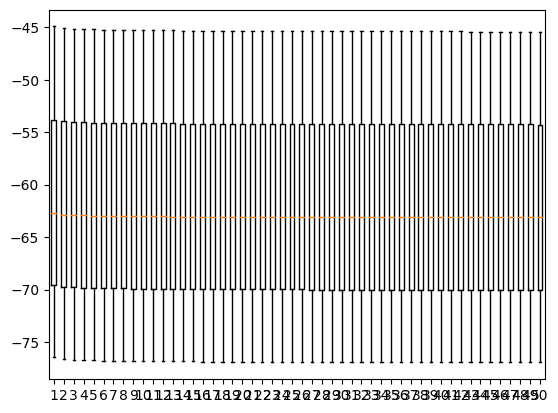

In [207]:
r2 = []
rmse = []
for al in alphas:
    ri = Ridge(alpha=al)
    cv = pd.DataFrame(cross_validate(ri,X,y,cv=folds,n_jobs=3,return_train_score=True,scoring=("max_error","r2","explained_variance","neg_root_mean_squared_error")))
    rmse.append(cv["train_neg_root_mean_squared_error"])
    r2.append(cv["train_r2"])
plt.boxplot(rmse);

In [208]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,r2_score

In [209]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.33, random_state=9)

In [212]:
alphas = np.linspace(0.001,5,50)
alphas;

/home/rick/.local/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:634: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.573e+05, tolerance: 1.795e+02
  model = cd_fast.enet_coordinate_descent(


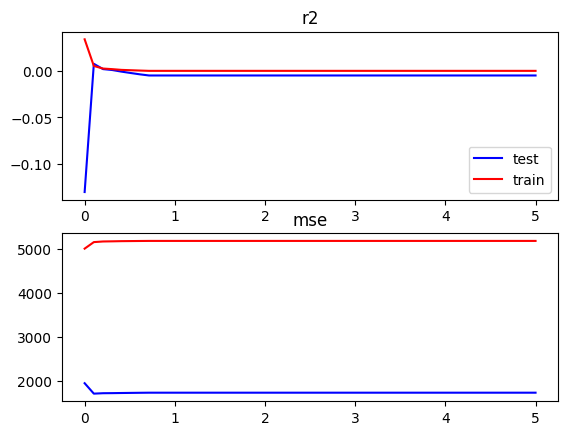

In [213]:
lr = LinearRegression()
lr.fit(X_train,y_train)
lr_beta_size_1 = np.sum(np.abs(np.concatenate((lr.coef_[0],lr.intercept_))))

train_mse = []
test_mse = []
train_r2 = []
test_r2 = []
betas = []

for al in alphas:
    la = Lasso(alpha=al)
    la.fit(X_train,y_train)
    
    y_test_pred = la.predict(X_test)
    y_train_pred= la.predict(X_train)
    
    train_r2.append(r2_score(y_train, y_train_pred))
    test_r2.append(r2_score(y_test, y_test_pred))
    
    train_mse.append(mean_squared_error(y_train, y_train_pred))
    test_mse.append(mean_squared_error(y_test, y_test_pred))
    betas.append(np.sum(np.abs(np.concatenate((la.coef_,la.intercept_))))/lr_beta_size_1)
    
results = pd.DataFrame({"train_r2":train_r2,"test_r2":test_r2,"test_mse":test_mse,"train_mse":train_mse,"alpha":alphas,"betas":betas})
fig, ax = plt.subplots(2)
ax[0].set_title("r2")
ax[0].plot(results["alpha"],results["test_r2"],label="test",color='blue');
ax[0].plot(results["alpha"],results["train_r2"],label="train",color='red');
ax[1].set_title("mse")
ax[1].plot(results["alpha"],results["test_mse"],label="test",color='blue');
ax[1].plot(results["alpha"],results["train_mse"],label="train",color='red');
ax[0].legend()

,train_r2,test_r2,test_mse,train_mse,alpha,betas
1,0.005226,0.007551,1710.942342,5160.993748,0.10302,2.986548e-14


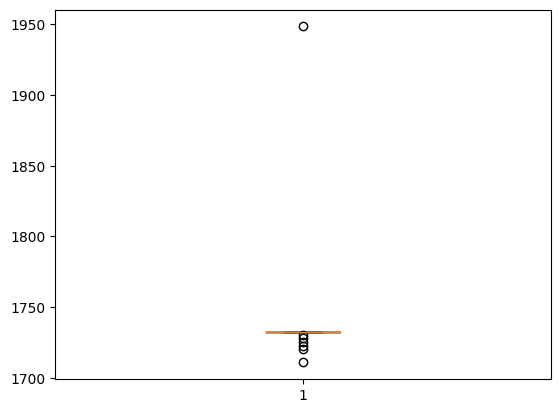

In [214]:
aux = "test_mse" #'test_mse'
plt.boxplot(results[aux]);
results[results[aux] == results[aux].min()]

In [215]:
#origin é 1. American, 2. European, 3. Japanese
la = Lasso(alpha=0.13)
la.fit(X,y)
for i in range(len(df1.columns)):
    print(f"coef de {list(df1.columns)[i]}:{la.coef_[i]} ")

coef de X:0.0 
coef de Y:0.0 
coef de month:-0.0 
coef de day:-0.0 
coef de FFMC:-0.0 
coef de DMC:-4.20859342830891 
coef de DC:0.0 
coef de ISI:0.0 
coef de temp:-0.0 
coef de RH:0.0 
coef de wind:-10.258076619249907 
coef de rain:-0.0 
coef de area:-0.0 


In [216]:
#origin é 1. American, 2. European, 3. Japanese
la = Ridge(alpha=0.13)
la.fit(X,y)
for i in range(len(df1.columns)):
    print(f"coef de {list(df1.columns)[i]}:{la.coef_[0][i]} ")

coef de X:0.0 
coef de Y:58.99999352542882 
coef de month:3.632213693110497 
coef de day:21.475489805040546 
coef de FFMC:8.260839401761407 
coef de DMC:-10.318438615421636 
coef de DC:24.28396828057299 
coef de ISI:12.60036258885694 
coef de temp:-30.165044094452487 
coef de RH:32.74437599392614 
coef de wind:-59.45713282127469 
coef de rain:24.749059179553846 
coef de area:-1.0713363849563622 


In [217]:
la.intercept_

array([22.0118541])

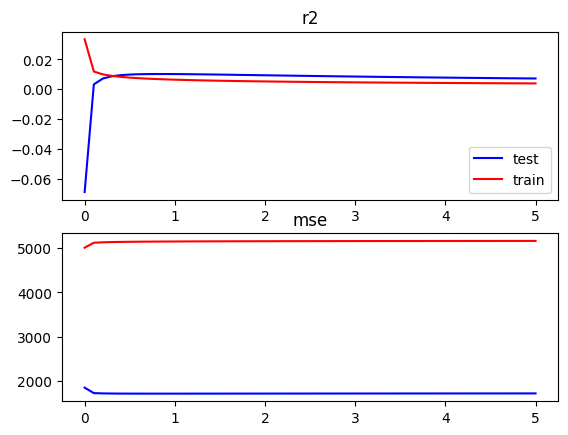

In [218]:
lr = LinearRegression()
lr.fit(X_train,y_train)
lr_beta_size_2 = np.sum(np.square(np.concatenate((lr.coef_[0],lr.intercept_))))

train_mse = []
test_mse = []
train_r2 = []
test_r2 = []
betas = []

for al in alphas:
    la = Ridge(alpha=al)
    la.fit(X_train,y_train)
    
    y_test_pred = la.predict(X_test)
    y_train_pred= la.predict(X_train)
    
    train_r2.append(r2_score(y_train, y_train_pred))
    test_r2.append(r2_score(y_test, y_test_pred))
    
    train_mse.append(mean_squared_error(y_train, y_train_pred))
    test_mse.append(mean_squared_error(y_test, y_test_pred))
    betas.append(np.sum(np.square(np.concatenate((la.coef_[0],la.intercept_))))/lr_beta_size_2)
    
results = pd.DataFrame({"train_r2":train_r2,"test_r2":test_r2,"test_mse":test_mse,"train_mse":train_mse,"alpha":alphas,"betas":betas})
fig, ax = plt.subplots(2)
ax[0].set_title("r2")
ax[0].plot(results["alpha"],results["test_r2"],label="test",color='blue');
ax[0].plot(results["alpha"],results["train_r2"],label="train",color='red');
ax[1].set_title("mse")
ax[1].plot(results["alpha"],results["test_mse"],label="test",color='blue');
ax[1].plot(results["alpha"],results["train_mse"],label="train",color='red');
ax[0].legend()

In [219]:
la.intercept_

array([12.98378174])

In [220]:
from sklearn.linear_model import RidgeCV,LassoCV

In [224]:
la = LassoCV(cv=3,max_iter=10000,alphas=alphas,verbose=True);
la.fit(X,y);
print(la.score(X,y))
print(la.alpha_)

/home/rick/.local/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:1561: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
................................................./home/rick/.local/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:620: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 48299.93179936241, tolerance: 204.9909255676452
  model = cd_fast.enet_coordinate_descent_gram(
..................................................

0.0018317211499755404
0.4090816326530612


/home/rick/.local/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:620: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1286.2194452389376, tolerance: 72.52289858997098
  model = cd_fast.enet_coordinate_descent_gram(
................................................../home/rick/.local/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:620: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 6282.112264191965, tolerance: 138.4051404004057
  model = cd_fast.enet_coordinate_descent_gram(
.[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.4s finished


In [225]:
la.coef_

array([ 0.        , -0.        , -0.        , -0.        , -0.        ,
       -6.58002242,  0.        ,  0.        , -0.        , -0.        ,
       -0.        , -0.        , -0.        , -0.        , -0.        ,
       -0.        , -0.        , -0.        ,  0.        ,  0.        ,
       -0.        , -0.        , -0.        , -0.        , -0.        ,
       -0.        , -0.        , -0.        , -0.        , -0.        ,
       -0.        , -0.        , -0.        , -0.        , -0.        ,
       -0.        , -0.        , -0.        , -0.        ,  0.        ,
       -0.        , -0.        , -0.        , -0.        , -0.        ,
       -0.        , -0.        , -0.        , -0.        , -0.        ,
       -0.        , -0.        , -0.        , -0.        , -0.        ,
       -0.        , -0.        , -0.        , -0.        , -0.        ,
       -0.        , -0.        , -0.        ,  0.        ,  0.        ,
       -0.        ,  0.        , -0.        , -0.        , -0.  

In [226]:
ri = RidgeCV(cv=3);
ri.fit(X,y);
print(ri.score(X,y))
print(ri.alpha_)

0.004726741118714406
10.0


In [227]:
la = LassoCV(cv=3,max_iter=10000,verbose=True,selection="cyclic",eps=000000.1);
la.fit(X,y);
print(la.score(X,y))
print(la.alpha_)

0.0017418607711160439
0.42628969059025257


/home/rick/.local/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:1561: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
............................................................................................................................................................................................................................................................................................................[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.1s finished


In [157]:
?LassoCV

Init signature:
LassoCV(
    *,
    eps=0.001,
    n_alphas=100,
    alphas=None,
    fit_intercept=True,
    precompute='auto',
    max_iter=1000,
    tol=0.0001,
    copy_X=True,
    cv=None,
    verbose=False,
    n_jobs=None,
    positive=False,
    random_state=None,
    selection='cyclic',
)
Docstring:     
Lasso linear model with iterative fitting along a regularization path.

See glossary entry for :term:`cross-validation estimator`.

The best model is selected by cross-validation.

The optimization objective for Lasso is::

    (1 / (2 * n_samples)) * ||y - Xw||^2_2 + alpha * ||w||_1

Read more in the :ref:`User Guide <lasso>`.

Parameters
----------
eps : float, default=1e-3
    Length of the path. ``eps=1e-3`` means that
    ``alpha_min / alpha_max = 1e-3``.

n_alphas : int, default=100
    Number of alphas along the regularization path.

alphas : array-like, default=None
    List of alphas where to compute the models.
    If ``None`` alphas are set automatically.

fit_inter